In [1]:
using PyPlot

In [2]:
# matplotlib parameters
matplotlib["rcParams"][:update](["axes.labelsize" => 22,
                                 "axes.titlesize" => 20,
                                 "font.size" => 18,
                                 "legend.fontsize" => 14,
                                 "axes.linewidth" => 1.5,
                                 "font.family" => "serif",
                                 "font.serif" => "Computer Modern Roman",
                                 "xtick.labelsize" => 20,
                                 "xtick.major.size" => 5.5,
                                 "xtick.major.width" => 1.5,
                                 "ytick.labelsize" => 20,
                                 "ytick.major.size" => 5.5,
                                 "ytick.major.width" => 1.5,
                                 "text.usetex" => true,
                                 "figure.autolayout" => true])

In [3]:
import BP

In [4]:
exdef = BP.ExactStates(100, :symmetric, 45, 1/11, 0.02, 0, 0);

In [5]:
#full plot range, both in x and y
const xm = [-div(exdef.N-1,2):div(exdef.N-1,2)];

In [6]:
k = linspace(-π, π, 200);

In [7]:
β=0;

In [8]:
state = BP.getstate(exdef, β+1);

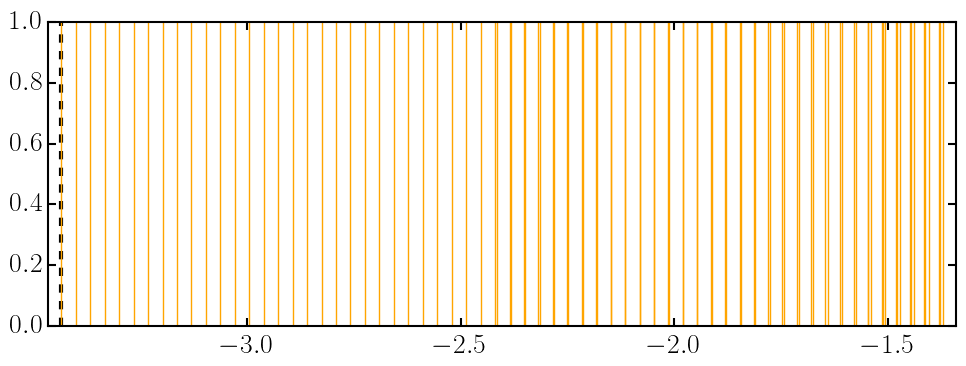

In [9]:
f, ax = plt.subplots(figsize=(10, 4))

ax[:axvline](x = exdef.νs[β+1], color="black", ls="dashed", linewidth="3")

for ω in exdef.νs
    ax[:axvline](x = ω, color="orange")
end 

ax[:set_xlim](exdef.νs[1] - 0.03, exdef.νs[end] + 0.03)

plt.close(f)

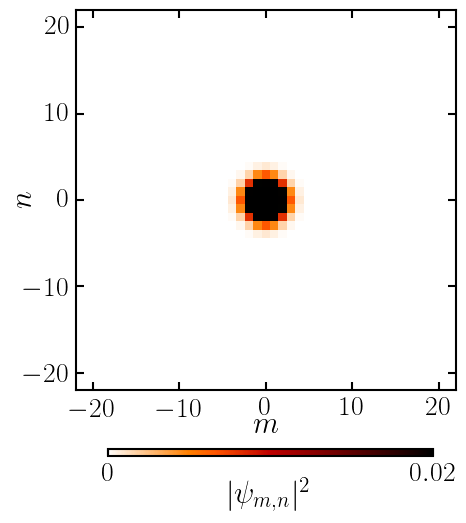

In [10]:
f, ax = plt.subplots(figsize=(5, 5))
img = ax[:imshow](abs2(state), origin="upper", ColorMap("gist_heat_r"), interpolation="none",
                 extent=[xm[1], xm[end], xm[1], xm[end]],
                 vmin=0, vmax=0.02)

ax[:set_ylabel](L"$n$", labelpad=-10)
ax[:set_xlabel](L"$m$", labelpad=-6)
    
cbaxes = f[:add_axes]([0.25, 0.03, 0.65, 0.015])
cbar = f[:colorbar](img, cax=cbaxes, orientation="horizontal")
cbar[:set_ticks]([0, 0.02])
cbar[:set_ticklabels]([L"$0$", L"$0.02$"])
cbar[:set_label](L"$|\psi_{m,n}|^2$", rotation=0, labelpad=-5, y=0.5)
cbar[:solids][:set_edgecolor]("face")

plt.close(f)

In [11]:
extrema(abs2(state))

(4.438850663806998e-38,0.09713818841198457)

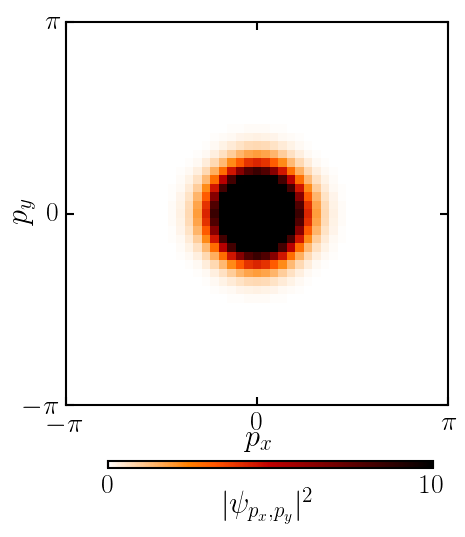

In [12]:
f, ax = plt.subplots(figsize=(5, 5))

img = ax[:imshow](abs2(fftshift(fft(state))),
            origin="upper", ColorMap("gist_heat_r"), interpolation="none",
            extent=[-π, π, -π, π],
            vmin=0, vmax=10)

ax[:set_xticks]([-π,0,π])
ax[:set_yticks]([-π,0,π])

ax[:set_xticklabels]([L"$-\pi$",L"$0$",L"$\pi$"])
ax[:set_yticklabels]([L"$-\pi$",L"$0$",L"$\pi$"])

ax[:set_xlabel](L"$p_x$", labelpad=-4)
ax[:set_ylabel](L"$p_y$", labelpad=-10)

cbaxes = f[:add_axes]([0.25, 0.03, 0.65, 0.015])
cbar = f[:colorbar](img, cax=cbaxes, orientation="horizontal")
cbar[:set_ticks]([0, 10])
cbar[:set_label](L"$|\psi_{p_x,p_y}|^2$", rotation=0, labelpad=-5, y=0.5)
cbar[:solids][:set_edgecolor]("face")


plt.close(f)

In [13]:
extrema(abs2(fft(state)))

(1.679266551537706e-22,41.16625918773767)

In [14]:
βs = [30, 38, 59, 99];

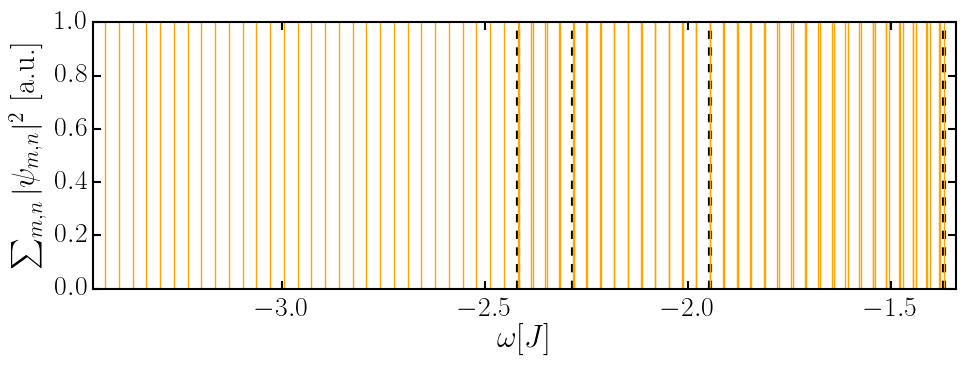

In [15]:
f, ax = plt.subplots(figsize=(10, 4))

for β in βs
    ax[:axvline](x = exdef.νs[β+1], color="black", ls="dashed", linewidth="3")
end

for ω in exdef.νs
    ax[:axvline](x = ω, color="orange")
end 

ax[:set_xlim](exdef.νs[1] - 0.03, exdef.νs[end] + 0.03)

ax[:set_xlabel](L"$\omega [J]$")
ax[:set_ylabel](L"$\sum_{m,n} |\psi_{m,n}|^2$ [a.u.]")

f[:savefig]("../figures/sym_ring_spect.png", transparent=true, pad_inches=0.0, bbox_inches="tight")

plt.close(f)

In [ ]:
#TODO: color second ladder states differently

In [ ]:
#TODO: use in presentation & paper

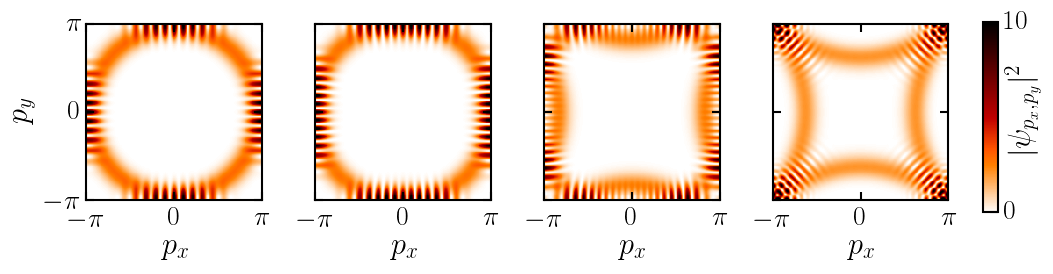

In [16]:
f, axes = plt.subplots(1,4, figsize=(10, 5))

for i = 1:4 #loop over columns
    ax = axes[i]
    img = ax[:imshow](abs2(BP.myfft2(BP.getstate(exdef, βs[i]+1), k,k)), origin="upper", ColorMap("gist_heat_r"), interpolation="none",
    extent=[-π, π, -π, π], vmin=0, vmax=10)
    
    ax[:set_xlabel](L"$p_x$")
    ax[:set_xticks]([-π,0,π])
    ax[:set_yticks]([-π,0,π])

    ax[:set_xticklabels]([L"$-\pi$",L"$0$",L"$\pi$"])

    if i == 1 #leftmost panel
        ax[:set_ylabel](L"$p_y$")
        ax[:set_yticklabels]([L"$-\pi$",L"$0$",L"$\pi$"])
    else
        ax[:set_yticklabels]([])
    end
end 

#rect [left, bottom, width, height]

cbaxes = f[:add_axes]([1., 0.3, 0.015, 0.38])
cbar = f[:colorbar](img, cax=cbaxes, orientation="vertical")
cbar[:set_ticks]([0, 10])
cbar[:set_label](L"$|\psi_{p_x,p_y}|^2$", labelpad=-15, y=0.55)
cbar[:solids][:set_edgecolor]("face")


f[:savefig]("../figures/sym_ring.pdf", transparent=true, pad_inches=0.0, bbox_inches="tight")
plt.close(f)

In [ ]:
#TODO: add another row with zoomed in fringes

## Further investigation

In [17]:
#phase of w.f. in mom space

In [18]:
exdef = BP.ExactStates(100, :symmetric, 45, 1/11, 0.02, 0, 0);

In [19]:
β=1;

In [20]:
state = BP.getstate(exdef, β+1);

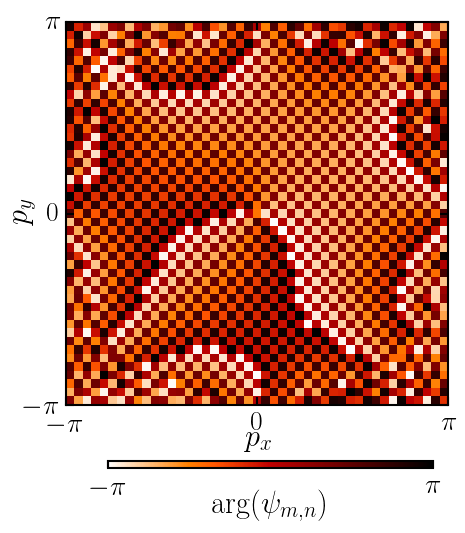

In [21]:
f, ax = plt.subplots(figsize=(5, 5))

img = ax[:imshow](angle(fftshift(fft(state))),
            origin="upper", ColorMap("gist_heat_r"), interpolation="none",
            extent=[-π, π, -π, π],
            vmin=-π, vmax=π)

ax[:set_xticks]([-π,0,π])
ax[:set_yticks]([-π,0,π])

ax[:set_xticklabels]([L"$-\pi$",L"$0$",L"$\pi$"])
ax[:set_yticklabels]([L"$-\pi$",L"$0$",L"$\pi$"])

ax[:set_xlabel](L"$p_x$", labelpad=-4)
ax[:set_ylabel](L"$p_y$", labelpad=-10)

cbaxes = f[:add_axes]([0.25, 0.03, 0.65, 0.015])
cbar = f[:colorbar](img, cax=cbaxes, orientation="horizontal")
cbar[:set_ticks]([-π, π])
cbar[:set_ticklabels]([L"$-\pi$", L"$\pi$"])
cbar[:set_label](L"$\arg(\psi_{m,n})$", rotation=0, labelpad=-5, y=0.5)
cbar[:solids][:set_edgecolor]("face")


plt.close(f)

In [22]:
#exp(im*m*ϕ)
ψ(m::Int, x::Float64, y::Float64) = ((x + im*y)/sqrt(x^2 + y^2))^m

ψ (generic function with 1 method)

In [23]:
function vortex(m::Int, xv::Array{Float64,1}, yv::Array{Float64,1})
    Ψ = Array(Complex{Float64}, length(yv), length(xv))
    for (j,x) in enumerate(xv), (i,y) in enumerate(yv)
        Ψ[i,j] = ψ(m, x, y)
    end
    Ψ
end

vortex (generic function with 1 method)

In [24]:
Ψ = vortex(3, linspace(-π, π, 200), linspace(-π, π, 200));

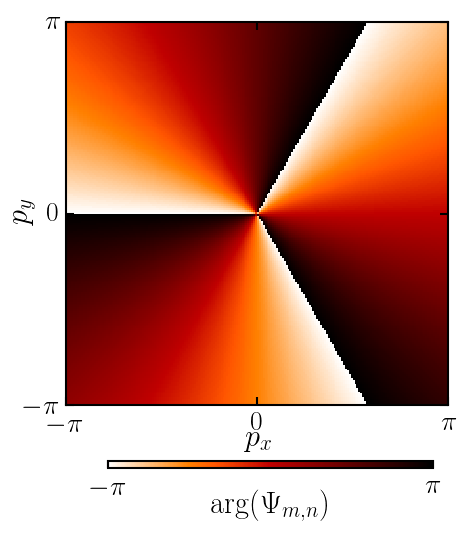

In [25]:
f, ax = plt.subplots(figsize=(5, 5))

img = ax[:imshow](angle(Ψ),
            origin="upper", ColorMap("gist_heat_r"), interpolation="none",
            extent=[-π, π, -π, π],
            vmin=-π, vmax=π)

ax[:set_xticks]([-π,0,π])
ax[:set_yticks]([-π,0,π])

ax[:set_xticklabels]([L"$-\pi$",L"$0$",L"$\pi$"])
ax[:set_yticklabels]([L"$-\pi$",L"$0$",L"$\pi$"])

ax[:set_xlabel](L"$p_x$", labelpad=-4)
ax[:set_ylabel](L"$p_y$", labelpad=-10)

cbaxes = f[:add_axes]([0.25, 0.03, 0.65, 0.015])
cbar = f[:colorbar](img, cax=cbaxes, orientation="horizontal")
cbar[:set_ticks]([-π, π])
cbar[:set_ticklabels]([L"$-\pi$", L"$\pi$"])
cbar[:set_label](L"$\arg(\Psi_{m,n})$", rotation=0, labelpad=-5, y=0.5)
cbar[:solids][:set_edgecolor]("face")


plt.close(f)